In [1]:
"""ReGraph hierarchy tutorial ex 2."""
import networkx as nx

from regraph import (NetworkXHierarchy, Rule,
                     add_nodes_from,
                     add_edges_from,
                     plot_graph, plot_instance, plot_rule)

In [2]:
# create an empty hierarchy
hierarchy = NetworkXHierarchy()

In [3]:
# initialize graphs
colors = nx.DiGraph()
add_nodes_from(
    colors,
    ["red", "blue"]
)
add_edges_from(
    colors,
    [("red", "red"), ("blue", "red"), ("red", "blue")]
)
hierarchy.add_graph("colors", colors)

mmm = nx.DiGraph()
add_nodes_from(
    mmm,
    ["component", "state", "action"]
)

add_edges_from(
    mmm,
    [("component", "action"),
     ("component", "component"),
     ("state", "component"),
     ("action", "state")]
)

hierarchy.add_graph("mmm", mmm)

mm = nx.DiGraph()
add_nodes_from(
    mm,
    ["gene", "residue", "state", "mod"]
)
add_edges_from(
    mm,
    [("residue", "gene"),
     ("state", "gene"),
     ("state", "residue"),
     ("mod", "state"),
     ("gene", "mod")]
)
hierarchy.add_graph("mm", mm)

action_graph = nx.DiGraph()
add_nodes_from(
    action_graph,
    ["A", "A_res_1", "p", "B", "mod"]
)

add_edges_from(
    action_graph,
    [("A_res_1", "A"),
     ("p", "A_res_1"),
     ("mod", "p"),
     ("B", "mod")]
)
hierarchy.add_graph(
    "ag", action_graph
)

nugget_1 = nx.DiGraph()
add_nodes_from(
    nugget_1,
    ["A", "A_res_1", "p", "B", "mod"]
)
add_edges_from(
    nugget_1,
    [("A_res_1", "A"),
     ("p", "A_res_1"),
     ("mod", "p"),
     ("B", "mod")]
)
hierarchy.add_graph(
    "n1", nugget_1
)

# add typings
hierarchy.add_typing(
    "mm", "mmm",
    {
        "gene": "component",
        "residue": "component",
        "state": "state",
        "mod": "action"
    }
)

hierarchy.add_typing(
    "mm", "colors",
    {
        "gene": "red",
        "residue": "red",
        "state": "red",
        "mod": "blue"
    }
)
hierarchy.add_typing(
    "ag", "mm",
    {
        "A": "gene",
        "B": "gene",
        "A_res_1": "residue",
        "mod": "mod",
        "p": "state"
    }
)
hierarchy.add_typing(
    "n1", "ag",
    dict((n, n) for n in nugget_1.nodes()),
)

/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/home/eugenia/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDepr

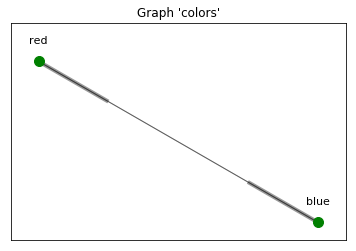

In [4]:
colors_pos = plot_graph(
    hierarchy.graph["colors"], title="Graph 'colors'")

/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/home/eugenia/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDepr

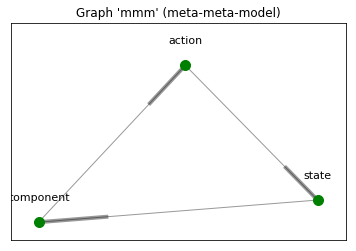

In [5]:
mmm_pos = plot_graph(
    hierarchy.graph["mmm"], title="Graph 'mmm' (meta-meta-model)")

/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/home/eugenia/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDepr

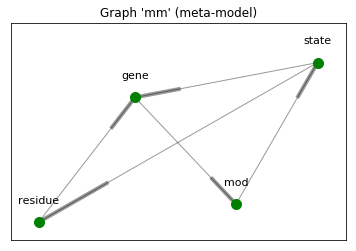

In [6]:
mm_pos = plot_graph(
    hierarchy.graph["mm"], title="Graph 'mm' (meta-model)")

/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/home/eugenia/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDepr

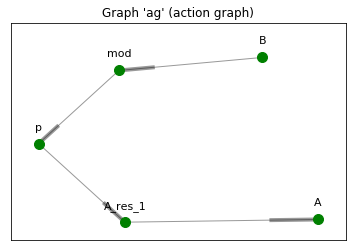

In [7]:
ag_pos = plot_graph(
    hierarchy.graph["ag"], title="Graph 'ag' (action graph)")

/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/home/eugenia/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDepr

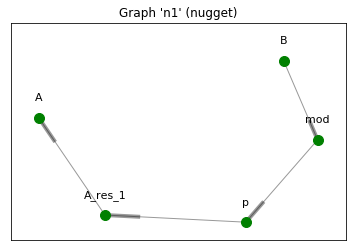

In [8]:
n1_pos = plot_graph(
    hierarchy.graph["n1"], title="Graph 'n1' (nugget)")


Rule 1: contains cloning of nodes
---------------------------------
Preserved part
{'gene': {}, 'residue': {}, 'gene1': {}}
[('residue', 'gene')]
Left hand side
{'gene': {}, 'residue': {}}
[('residue', 'gene')]
P->L Homomorphism : {'gene': 'gene', 'residue': 'residue', 'gene1': 'gene'}
Right hand side
{'gene': {}, 'residue': {}, 'gene1': {}}
[('residue', 'gene')]
P->R Homomorphism : {'gene': 'gene', 'residue': 'residue', 'gene1': 'gene1'}



/home/eugenia/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.

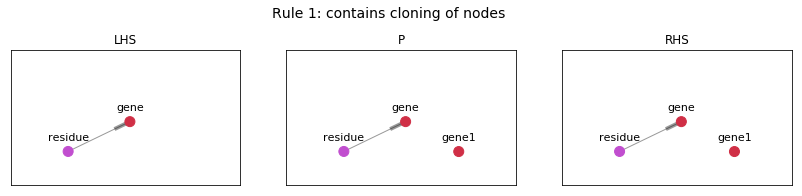

with the typing of the left-hand side:  {'mm': {'gene': 'gene', 'residue': 'residue'}}
Instances of the lhs found in 'ag':  [{'gene': 'A', 'residue': 'A_res_1'}]


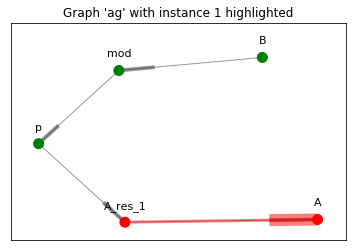

	-> Applying the rule to the instance of 'ag':  {'gene': 'A', 'residue': 'A_res_1'}


In [9]:
# define a rule that clones nodes
pattern = nx.DiGraph()
add_nodes_from(pattern, ["gene", "residue"])
add_edges_from(pattern, [("residue", "gene")])

cloning_rule = Rule.from_transform(pattern)
clone_name, _ = cloning_rule.inject_clone_node("gene")
cloning_rule.inject_remove_edge("residue", clone_name)

print("\nRule 1: contains cloning of nodes")
print("---------------------------------")
print(cloning_rule)
plot_rule(cloning_rule, title="Rule 1: contains cloning of nodes")

lhs_typing = {
    "mm": {"gene": "gene", "residue": "residue"}
}
print("with the typing of the left-hand side: ", lhs_typing)

# find matching of the lhs of the cloning rule in 'ag'
instances = hierarchy.find_matching(
    "ag", cloning_rule.lhs, lhs_typing)
print("Instances of the lhs found in 'ag': ", instances)
for i, instance in enumerate(instances):
    plot_instance(
        hierarchy.graph["ag"], cloning_rule.lhs,
        instance, parent_pos=ag_pos,
        title="Graph 'ag' with instance {} highlighted".format(i + 1))
    
print("\t-> Applying the rule to the instance of 'ag': ", instances[0])

In [10]:
_, rhs_instance = hierarchy.rewrite("ag", cloning_rule, instances[0])

	Result of rewriting with rule 1: 


/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/home/eugenia/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDepr

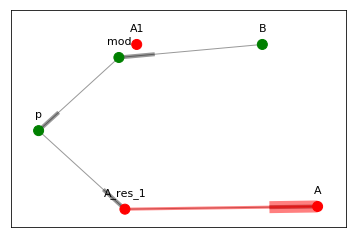

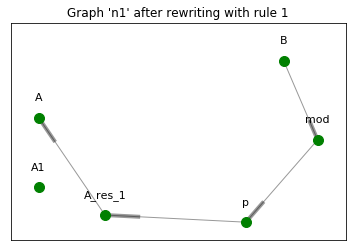

		Updated typing 'n1'->'ag':  {'A': 'A', 'A_res_1': 'A_res_1', 'p': 'p', 'B': 'B', 'mod': 'mod', 'A1': 'A1'}
		Updated typing 'ag'->'mm':  {'A': 'gene', 'A_res_1': 'residue', 'p': 'state', 'B': 'gene', 'mod': 'mod', 'A1': 'gene'}


In [11]:
print("\tResult of rewriting with rule 1: ")
plot_instance(hierarchy.graph["ag"], cloning_rule.rhs, rhs_instance,
              parent_pos=ag_pos)
plot_graph(hierarchy.graph["n1"],
           title="Graph 'n1' after rewriting with rule 1", parent_pos=n1_pos)
print("\t\tUpdated typing 'n1'->'ag': ", hierarchy.edge["n1"]["ag"].mapping)
print("\t\tUpdated typing 'ag'->'mm': ", hierarchy.edge["ag"]["mm"].mapping)


Rule 2: contains addition of nodes 
----------------------------------
Preserved part
{'B': {}}
[]
Left hand side
{'B': {}}
[]
P->L Homomorphism : {'B': 'B'}
Right hand side
{'B': {}, 'B_res_1': {}, 'X': {}, 'Y': {}}
[('B_res_1', 'B')]
P->R Homomorphism : {'B': 'B'}



/home/eugenia/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or

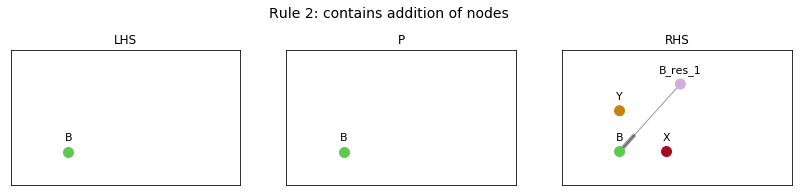

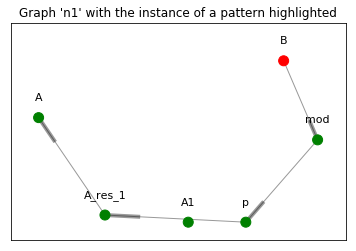

with the typing of the right-hand side:  {'mm': {'B_res_1': 'residue'}, 'mmm': {'X': 'component'}, 'colors': {'Y': 'red'}}


In [12]:
# create a rule that adds new nodes
p = nx.DiGraph()
add_nodes_from(p, ["B"])

l = nx.DiGraph()
add_nodes_from(l, ["B"])

r = nx.DiGraph()
add_nodes_from(r, ["B", "B_res_1", "X", "Y"])
add_edges_from(r, [("B_res_1", "B")])

adding_rule = Rule(p, l, r)
print("\nRule 2: contains addition of nodes ")
print("----------------------------------")
print(adding_rule)
plot_rule(adding_rule, title="Rule 2: contains addition of nodes")

instance = {"B": "B"}
plot_instance(
    hierarchy.graph["n1"], adding_rule.lhs, instance,
    title="Graph 'n1' with the instance of a pattern highlighted",
    parent_pos=n1_pos)

# define the right-hand side typing of the rule
rhs_typing = {
    "mm": {"B_res_1": "residue"},
    "mmm": {"X": "component"},
    "colors": {"Y": "red"}
}
print("with the typing of the right-hand side: ", rhs_typing)

In [13]:
print("\t->Applying the rule to the instance: ", instance)

# perform rewriting
_, rhs_instance = hierarchy.rewrite(
    "n1", adding_rule, instance, lhs_typing=None, rhs_typing=rhs_typing)

	->Applying the rule to the instance:  {'B': 'B'}


	Result of rewriting with rule 2: 


/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/home/eugenia/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDepr

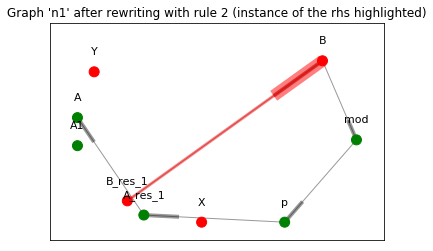

In [14]:
print("\tResult of rewriting with rule 2: ")
plot_instance(
    hierarchy.node["n1"].graph, adding_rule.rhs, rhs_instance, parent_pos=n1_pos,
    title="Graph 'n1' after rewriting with rule 2 "
          "(instance of the rhs highlighted)")

/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/home/eugenia/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDepr

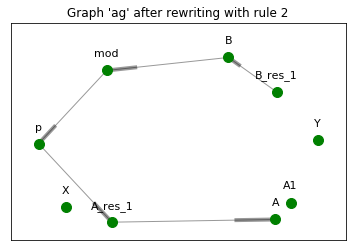

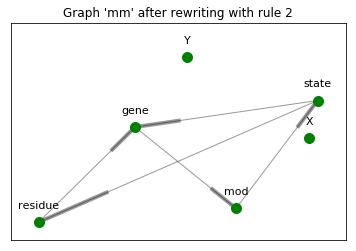

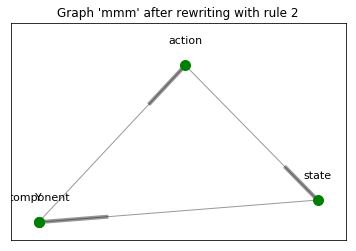

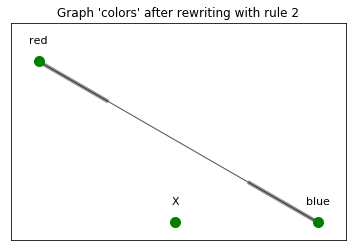

		Updated typing 'n1'->'ag':  {'A': 'A', 'A_res_1': 'A_res_1', 'p': 'p', 'B': 'B', 'mod': 'mod', 'A1': 'A1', 'B_res_1': 'B_res_1', 'X': 'X', 'Y': 'Y'}
		Updated typing 'ag'->'mm':  {'A': 'gene', 'A_res_1': 'residue', 'p': 'state', 'B': 'gene', 'mod': 'mod', 'A1': 'gene', 'B_res_1': 'residue', 'X': 'X', 'Y': 'Y'}
		Updated typing 'mm'->'mmm':  {'gene': 'component', 'residue': 'component', 'state': 'state', 'mod': 'action', 'X': 'component', 'Y': 'Y'}
		Updated typing 'mm'->'colors':  {'gene': 'red', 'residue': 'red', 'state': 'red', 'mod': 'blue', 'X': 'X', 'Y': 'red'}


In [15]:
plot_graph(hierarchy.node["ag"].graph, parent_pos=ag_pos,
           title="Graph 'ag' after rewriting with rule 2")
plot_graph(hierarchy.node["mm"].graph, parent_pos=mm_pos,
           title="Graph 'mm' after rewriting with rule 2")
plot_graph(hierarchy.node["mmm"].graph, parent_pos=mmm_pos,
           title="Graph 'mmm' after rewriting with rule 2")
plot_graph(hierarchy.node["colors"].graph, parent_pos=colors_pos,
           title="Graph 'colors' after rewriting with rule 2")

print("\t\tUpdated typing 'n1'->'ag': ", hierarchy.edge["n1"]["ag"].mapping)
print("\t\tUpdated typing 'ag'->'mm': ", hierarchy.edge["ag"]["mm"].mapping)
print("\t\tUpdated typing 'mm'->'mmm': ", hierarchy.edge["mm"]["mmm"].mapping)
print("\t\tUpdated typing 'mm'->'colors': ",
      hierarchy.edge["mm"]["colors"].mapping)


Rule 3: contains merge of nodes
-------------------------------
Preserved part
{1: {}, 2: {}}
[]
Left hand side
{1: {}, 2: {}}
[(2, 1)]
P->L Homomorphism : {1: 1, 2: 2}
Right hand side
{'hybrid': {}}
[]
P->R Homomorphism : {1: 'hybrid', 2: 'hybrid'}

with the typing of the left-hand side:  {'mm': {1: 'gene', 2: 'residue'}}
with the typing of the right-hand side:  {'mmm': {'hybrid': 'component'}}


/home/eugenia/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.

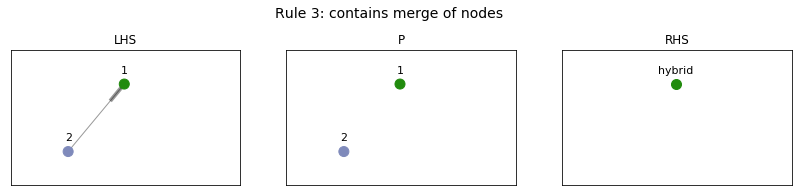

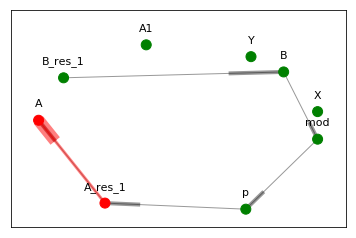

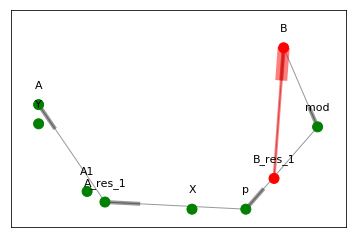

In [16]:
# define a rule that merges nodes
pattern = nx.DiGraph()
pattern.add_nodes_from([1, 2])
pattern.add_edges_from([(2, 1)])
merging_rule = Rule.from_transform(pattern)
merging_rule.inject_remove_edge(2, 1)
merging_rule.inject_merge_nodes([1, 2], "hybrid")
print("\nRule 3: contains merge of nodes")
print("-------------------------------")
print(merging_rule)

lhs_typing = {"mm": {1: "gene", 2: "residue"}}
rhs_typing = {"mmm": {"hybrid": "component"}}

print("with the typing of the left-hand side: ", lhs_typing)
print("with the typing of the right-hand side: ", rhs_typing)


plot_rule(merging_rule, title="Rule 3: contains merge of nodes")

instances = hierarchy.find_matching("n1", merging_rule.lhs, lhs_typing)
for instance in instances:
    plot_instance(hierarchy.graph["n1"], merging_rule.lhs, instance, parent_pos=n1_pos)

In [17]:
print("\t-> Applying the rule to the instance of 'n1': ", instances[0])
hierarchy.rewrite(
    "n1", merging_rule, instances[0], rhs_typing)


print("\t-> Applying the rule to the instance of 'n1': ", instances[1])
hierarchy.rewrite(
    "n1", merging_rule, instances[1], rhs_typing)



	-> Applying the rule to the instance of 'n1':  {1: 'A', 2: 'A_res_1'}
	-> Applying the rule to the instance of 'n1':  {1: 'B', 2: 'B_res_1'}


(<regraph.networkx.hierarchy.NetworkXHierarchy at 0x7f63e837c908>,
 {'hybrid': 'B_B_res_1'})

	Result of rewriting with rule 3 both instances ([{1: 'A', 2: 'A_res_1'}, {1: 'B', 2: 'B_res_1'}]): 


/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/home/eugenia/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDepr

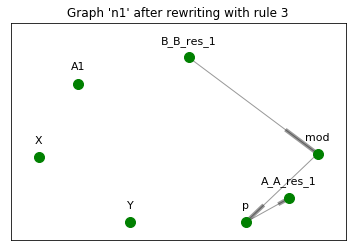

{'A': array([0.        , 0.52783888]),
 'A1': array([0.14092979, 0.84156533]),
 'A_A_res_1': array([0.8978024 , 0.14570863]),
 'A_res_1': array([0.23787796, 0.03610898]),
 'B': array([0.87829644, 0.81476292]),
 'B_B_res_1': array([0.53825599, 1.        ]),
 'X': array([0.        , 0.39649008]),
 'Y': array([0.32896458, 0.        ]),
 'mod': array([1.        , 0.41559293]),
 'p': array([0.74268926, 0.        ])}

In [18]:
print("\tResult of rewriting with rule 3 both instances ({}): ".format(
    instances))
plot_graph(hierarchy.node["n1"].graph, parent_pos=n1_pos,
           title="Graph 'n1' after rewriting with rule 3")

/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/eugenia/anaconda3/lib/python3.6/site-packages/networkx-1.11-py3.6.egg/networkx/drawing/nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
/home/eugenia/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDepr

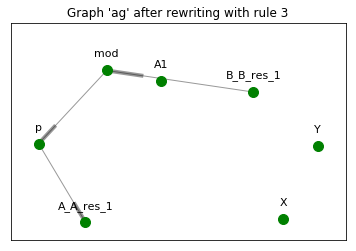

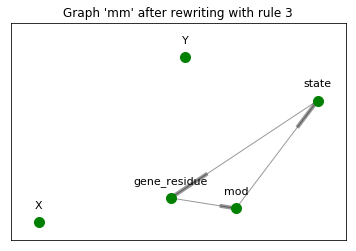

		Updated typing 'n1'->'ag':  {'p': 'p', 'mod': 'mod', 'A1': 'A1', 'X': 'X', 'Y': 'Y', 'A_A_res_1': 'A_A_res_1', 'B_B_res_1': 'B_B_res_1'}
		Updated typing 'ag'->'mm':  {'p': 'state', 'mod': 'mod', 'A1': 'gene_residue', 'X': 'X', 'Y': 'Y', 'A_A_res_1': 'gene_residue', 'B_B_res_1': 'gene_residue'}
		Updated typing 'mm'->'mmm':  {'state': 'state', 'mod': 'action', 'X': 'component', 'Y': 'Y', 'gene_residue': 'component'}
		Updated typing 'mm'->'colors':  {'state': 'red', 'mod': 'blue', 'X': 'X', 'Y': 'red', 'gene_residue': 'red'}


In [19]:
plot_graph(hierarchy.node["ag"].graph, parent_pos=ag_pos,
           title="Graph 'ag' after rewriting with rule 3")
plot_graph(hierarchy.node["mm"].graph, parent_pos=mm_pos,
           title="Graph 'mm' after rewriting with rule 3")
print("\t\tUpdated typing 'n1'->'ag': ", hierarchy.edge["n1"]["ag"].mapping)
print("\t\tUpdated typing 'ag'->'mm': ", hierarchy.edge["ag"]["mm"].mapping)
print("\t\tUpdated typing 'mm'->'mmm': ", hierarchy.edge["mm"]["mmm"].mapping)
print("\t\tUpdated typing 'mm'->'colors': ",
      hierarchy.edge["mm"]["colors"].mapping)

In [21]:
hierarchy.typing["mm"]["mmm"]["gene_residue"]

'component'